In [19]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import re
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [20]:
# load and credit data
credit_data = pd.read_csv('CRUpdate2.csv')
print(f"Shape of the data is: {credit_data.shape}")
credit_data.head()

# cr1 = credit_data[['ID', 'APPROVAL']]
# cr1.head()

Shape of the data is: (45985, 65)


,Unnamed: 0,ID,0,1,2,3,4,5,6,7,...,53,54,55,56,57,58,59,60,SUM,APPROVAL
0,0,5001711,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,3,YES
1,1,5001712,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10,NO
2,2,5001713,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,YES
3,3,5001714,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,YES
4,4,5001715,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,YES


In [21]:
# load and application data
application_data = pd.read_csv('applications.csv')
print(f"Shape of the data is: {application_data.shape}")
application_data.head()

Shape of the data is: (438557, 18)


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [22]:
# investigate rows with null values
application_data[application_data.isnull().any(axis=1)]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438549,6840098,F,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438550,6840100,F,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438551,6840102,F,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0


In [23]:
# # only take rows of businesses that Occupation Type is not null
# clean_app_data = application_data[application_data['OCCUPATION_TYPE'].notna()]

# # Drop insignificant columns
# clean_app_data = application_data.drop(['FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE'], axis=1)
# clean_app_data.head()

# Drop insignificant columns
clean_app_data = application_data.drop(['FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL'], axis=1)
clean_app_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,Sales staff,1.0


In [24]:
## merge tables 
loan_data = clean_app_data.merge(credit_data, on='ID', how='inner')
loan_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,53,54,55,56,57,58,59,60,SUM,APPROVAL
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,0,0,0,0,0,0,0,0,3,YES
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,0,0,0,0,0,0,0,0,3,YES
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,0,0,0,0,0,7,NO
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,0,0,0,0,0,0,0,2,YES
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,0,0,0,0,0,0,0,0,YES


In [25]:
loan_data['CODE_GENDER'] = loan_data['CODE_GENDER'].astype('category').cat.codes
loan_data['FLAG_OWN_CAR'] = loan_data['FLAG_OWN_CAR'].astype('category').cat.codes
loan_data['FLAG_OWN_REALTY'] = loan_data['FLAG_OWN_REALTY'].astype('category').cat.codes
loan_data['NAME_INCOME_TYPE'] = loan_data['NAME_INCOME_TYPE'].astype('category').cat.codes
loan_data['NAME_EDUCATION_TYPE'] = loan_data['NAME_EDUCATION_TYPE'].astype('category').cat.codes
loan_data['NAME_FAMILY_STATUS'] = loan_data['NAME_FAMILY_STATUS'].astype('category').cat.codes
loan_data['NAME_HOUSING_TYPE'] = loan_data['NAME_HOUSING_TYPE'].astype('category').cat.codes
# loan_data['APPROVAL'] = loan_data['APPROVAL'].astype('category').cat.codes
loan_data['OCCUPATION_TYPE'] = loan_data['OCCUPATION_TYPE'].astype('category').cat.codes
data_clean = loan_data.dropna(axis=0)
data_clean.head()



,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,53,54,55,56,57,58,59,60,SUM,APPROVAL
0,5008804,1,1,1,0,427500.0,4,1,0,4,...,0,0,0,0,0,0,0,0,3,YES
1,5008805,1,1,1,0,427500.0,4,1,0,4,...,0,0,0,0,0,0,0,0,3,YES
2,5008806,1,1,1,0,112500.0,4,4,1,1,...,0,0,0,0,0,0,0,0,7,NO
3,5008808,0,0,1,0,270000.0,0,4,3,1,...,0,0,0,0,0,0,0,0,2,YES
4,5008809,0,0,1,0,270000.0,0,4,3,1,...,0,0,0,0,0,0,0,0,0,YES


In [26]:
# Assign X (data) and y(target)
X = data_clean.drop("APPROVAL", axis=1)
y = data_clean["APPROVAL"]
print(X.shape, y.shape)

(36457, 78) (36457,)


In [27]:
# Split our data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, stratify=y)

In [28]:
# Create a logistic Regression Model
classifier = LogisticRegression()
classifier

LogisticRegression()

In [11]:
# Fit model using the training data
classifier.fit(X_train, y_train)

LogisticRegression()

In [12]:
# evaluate the model's performance using the test data
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.6426742740106796
Testing Data Score: 0.6426769061985738


In [13]:
# Make predictions
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO']
First 10 Actual labels: ['YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO']


In [14]:
# View predictions along with their probabilities of being within each class 
##  this will be the difficult part of our project because data is not binary like example: male/female
probs = classifier.predict_proba(X_test)
pred_df = pd.DataFrame({
    "Prediction": predictions, 
    "Actual": y_test, 
    "P(YES)": [p[0] for p in probs], 
    "P(NO)": [p[1] for p in probs]
    }).reset_index(drop=True)

pred_df.head(10)

,Prediction,Actual,P(YES),P(NO)
0,NO,YES,0.649571,0.350429
1,NO,YES,0.658438,0.341562
2,NO,NO,0.691342,0.308658
3,NO,NO,0.641408,0.358592
4,NO,NO,0.634319,0.365681
5,NO,NO,0.622585,0.377415
6,NO,NO,0.651193,0.348807
7,NO,NO,0.664334,0.335666
8,NO,NO,0.661883,0.338117
9,NO,NO,0.676283,0.323717


In [15]:
# Model Evaluation
# Create a Confusion Matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,predictions)

array([[5858,    0],
       [3257,    0]], dtype=int64)

In [16]:
# Label the confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(f"True Neg: {tn}   False Pos: {fp}")
print(f"False Neg: {fn}  True Pos: {tp}")

True Neg: 5858   False Pos: 0
False Neg: 3257  True Pos: 0


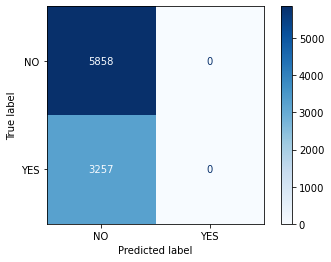

In [17]:
# Plot confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test, cmap="Blues")

In [18]:
# Precision and Recall
### we don't technically have a "positive" label, like we would if we were classifying emails as Spam, or patients as having cancer. 
## This means that we need to tell our precision and recall functions which class label we want to consider to be our "positive" class i.e. which lender
from sklearn.metrics import precision_score, recall_score, f1_score

In [52]:
## Random tests of lenders first test is 1, the lender with the most loans
precision_score(y_test, predictions, pos_label='YES')

0.0

In [53]:
## Random tests of lenders second test is 0, random test of lender with lower loan count of 10 loans
precision_score(y_test, predictions, pos_label=0)

0.6426769061985738

In [56]:
#  what is the harmonic mean of 1 Texas from first test
f1_score(y_test, predictions, pos_label=1)

0.0

In [57]:
#  what is the harmonic mean of 0 from second test
f1_score(y_test, predictions, pos_label=0)

0.7824751218860616